##  Loan Prediction Based on Customer Behavior
In today's fast-paced financial landscape, loan prediction plays a pivotal role in assessing creditworthiness and mitigating risk for lending institutions. The ability to accurately predict whether a loan applicant will default or repay their loan is crucial for ensuring sustainable lending practices and maximizing profitability. With the advancements in technology and the ever-increasing availability of data, machine learning (ML) models have emerged as powerful tools for loan prediction, offering improved accuracy and efficiency compared to traditional statistical approaches.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset
data= pd.read_csv('Training Data.csv', sep=',')

In [3]:
# First five rows
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
# last five rows
data.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0
251999,252000,9070230,70,17,single,rented,no,Statistician,Avadi,Tamil_Nadu,7,11,0


In [5]:
# Shape of data
data.shape

(252000, 13)

* Dataset contains 14 features with 10000 observations.

In [6]:
# Columns in dataset
data.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [7]:
# Information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [8]:
# Statistics of data
data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [9]:
# Statistics of data for categorical data
data.describe(include='O')

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


## Exploratory Data Analysis

In [10]:
data.drop('Id', axis=1,inplace=True)

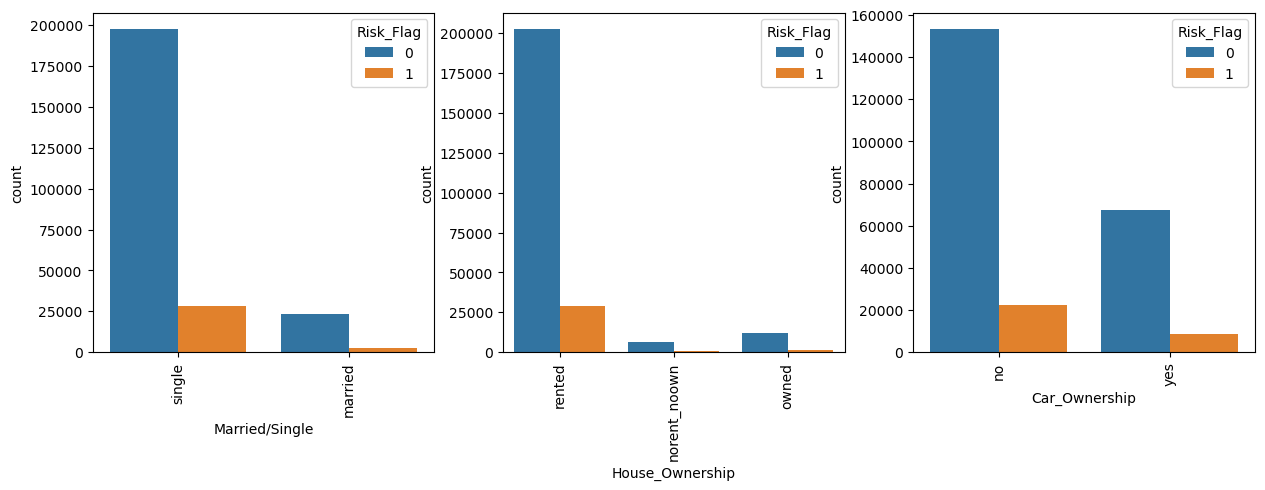

In [11]:
# Plot categorical variable
categorical_data=['Married/Single','House_Ownership','Car_Ownership']

plt.figure(figsize=(15,15),facecolor='white')
plotno = 1 ## counter

for column in categorical_data:
    if plotno<=20: ## acessing the column
        plt.subplot(3,3,plotno) 
        sns.countplot(x=data[column],hue='Risk_Flag',data=data)
        plt.xticks(rotation=90)
        plotno+=1 ## counter increment
# show plot
plt.show()

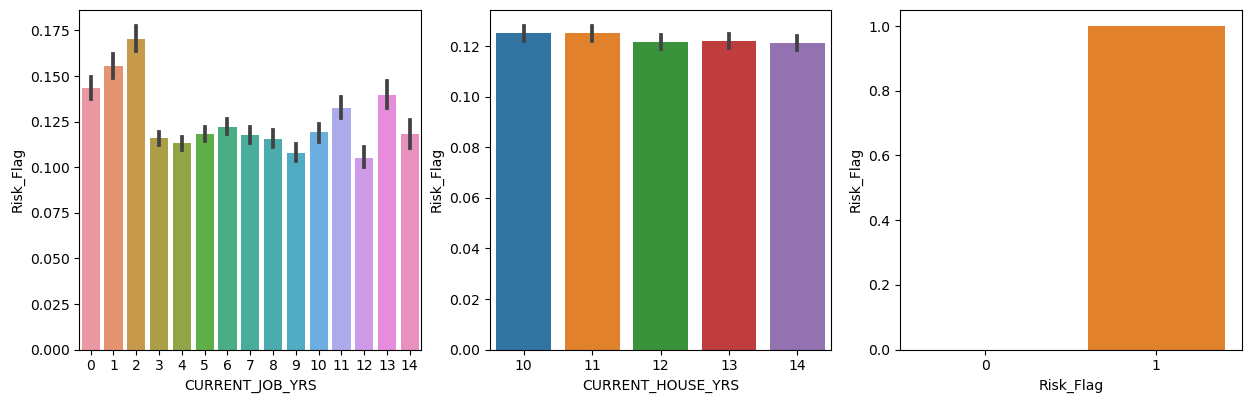

In [12]:
# Plot numerical features
numerical_data=['CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','Risk_Flag']

plt.figure(figsize=(15,15),facecolor='white')
plotno = 1 ## counter

for column in numerical_data:
    if plotno<=20: ## acessing the column
        plt.subplot(3,3,plotno) 
        sns.barplot(y='Risk_Flag',x=data[column],data=data)
        plotno+=1 ## counter increment
# show plot
plt.show()

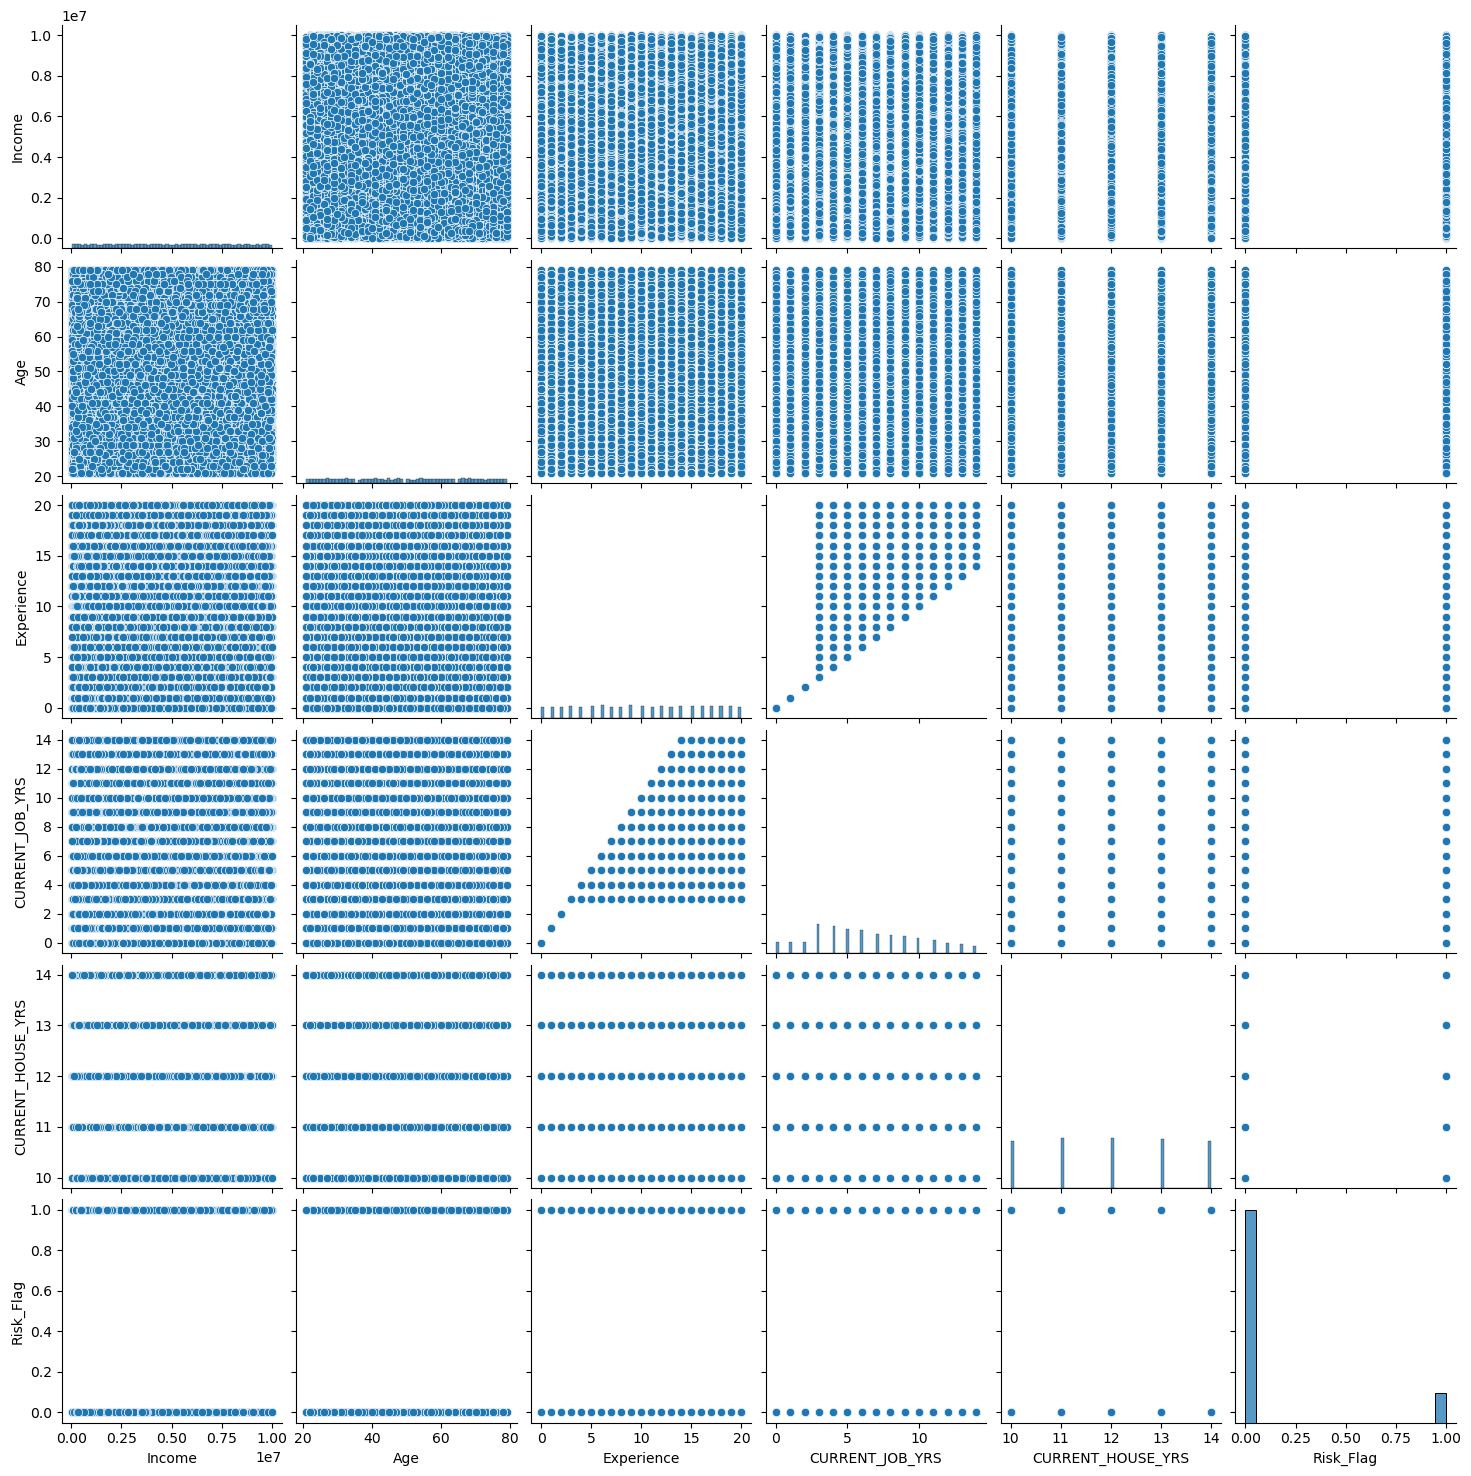

In [13]:
sns.pairplot(data)

## Data Preprocessing

In [14]:
data.drop(['CITY','STATE'],axis=1,inplace=True)

In [15]:
# Check missing values in data
data.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [16]:
# Counts of Married/Single
data['Married/Single'].value_counts()

single     226272
married     25728
Name: Married/Single, dtype: int64

In [17]:
data['Married/Single']=data['Married/Single'].map({'single':1,'married':0})

In [18]:
# Counts of Married/Single
data['Married/Single'].value_counts()

1    226272
0     25728
Name: Married/Single, dtype: int64

In [19]:
# Counts of House_Ownership
data['House_Ownership'].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

In [20]:
# Label Encoding Technique
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [21]:
data['House_Ownership'] = lb.fit_transform(data['House_Ownership'])

In [22]:
# Counts of Car_Ownership
data['Car_Ownership'].value_counts()

no     176000
yes     76000
Name: Car_Ownership, dtype: int64

In [23]:
data['Car_Ownership']=data['Car_Ownership'].map({'no':1,'yes':0})

In [24]:
# Counts of Profession
data.Profession.value_counts()

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

In [25]:
data.Profession = lb.fit_transform(data.Profession)

In [26]:
# Counts of Profession
data.Profession.value_counts()

37    5957
44    5806
50    5397
40    5390
13    5372
19    5359
32    5357
22    5304
0     5281
12    5259
29    5250
33    5217
9     5205
47    5195
28    5178
23    5167
27    5166
25    5128
6     5127
42    5061
43    5053
36    5041
38    5035
14    4990
39    4944
34    4881
48    4864
4     4861
30    4818
15    4808
16    4782
41    4781
45    4772
5     4758
49    4737
17    4729
46    4714
26    4672
1     4668
3     4661
2     4657
8     4635
31    4628
10    4616
18    4598
20    4573
24    4507
7     4493
11    4413
35    4087
21    4048
Name: Profession, dtype: int64

In [27]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.1294867 , 0.03448276, 0.15      , ..., 0.21428571, 0.75      ,
        0.        ],
       [0.75720597, 0.32758621, 0.5       , ..., 0.64285714, 0.75      ,
        0.        ],
       [0.39856389, 0.77586207, 0.2       , ..., 0.28571429, 0.        ,
        0.        ],
       ...,
       [0.45168228, 0.43103448, 0.35      , ..., 0.5       , 0.5       ,
        0.        ],
       [0.65035635, 0.4137931 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.90693267, 0.84482759, 0.85      , ..., 0.5       , 0.25      ,
        0.        ]])

## Feature Selection

In [28]:
# Check redundant features
data.describe()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,0.897905,1.891722,0.698413,25.276746,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,0.302774,0.391880,0.458948,14.728537,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,1.000000,2.000000,0.000000,13.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,1.000000,2.000000,1.000000,26.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,1.000000,2.000000,1.000000,38.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,1.000000,2.000000,1.000000,50.000000,14.000000,14.000000,1.000000


<AxesSubplot:>

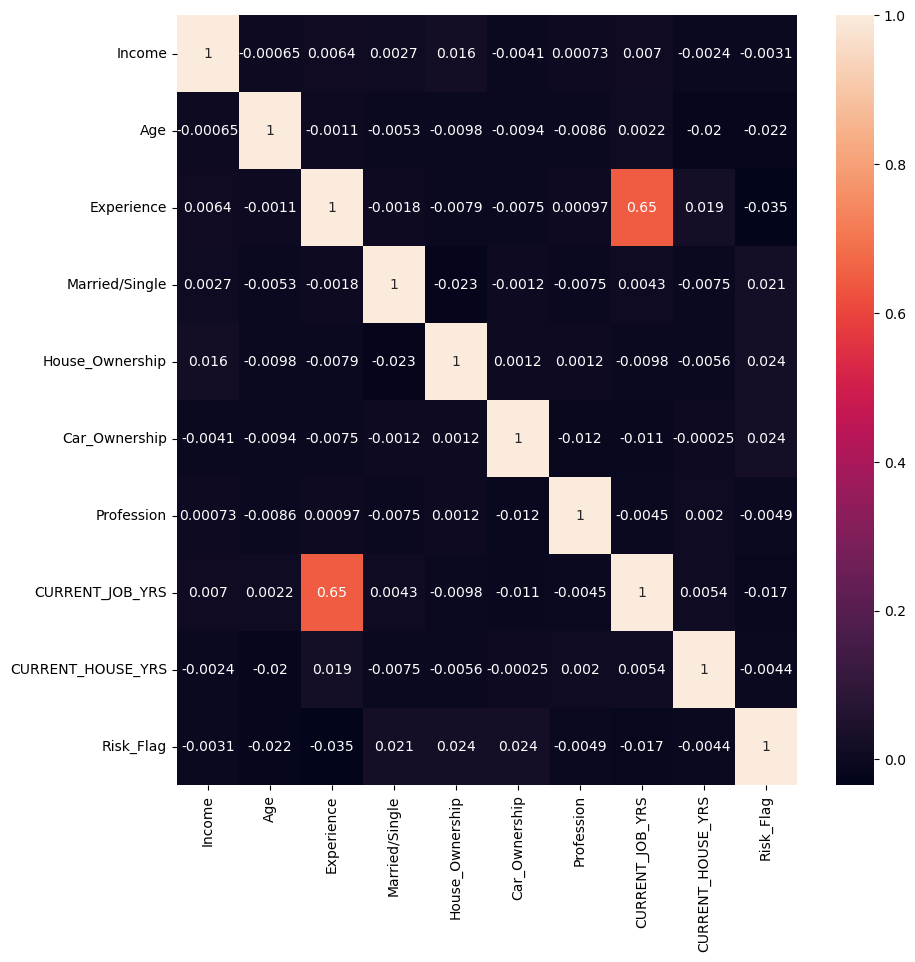

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

##  Model Selection and Building

In [30]:
# Creating Dependent & Independent variable
x = data.drop(['Risk_Flag'],axis=1)
y = data['Risk_Flag']

In [31]:
# Splitting data into train & test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [32]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((176400, 9), (75600, 9), (176400,), (75600,))

### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [34]:
y_pred = lr.predict(x_test)

In [35]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [37]:
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100)

Accuracy Score: 87.73677248677248


In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66329
           1       0.00      0.00      0.00      9271

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600



###  Bagging Classifier

In [39]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
bc.fit(x_train,y_train)

BaggingClassifier()

In [40]:
y_pred = bc.predict(x_test)

In [41]:
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [42]:
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100)

Accuracy Score: 89.75661375661376


In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     66329
           1       0.59      0.55      0.57      9271

    accuracy                           0.90     75600
   macro avg       0.76      0.75      0.76     75600
weighted avg       0.90      0.90      0.90     75600



### Naive Bayes

In [44]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(x_train,y_train)

BernoulliNB()

In [45]:
y_pred = nb.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100)

Accuracy Score: 87.73677248677248


In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66329
           1       0.00      0.00      0.00      9271

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600



### Support Vector Machine

In [48]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [49]:
y_pred = svc.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100)

Accuracy Score: 87.73677248677248


In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66329
           1       0.00      0.00      0.00      9271

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600



### Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [53]:
y_pred = rf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [54]:
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100)

Accuracy Score: 89.8994708994709


In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     66329
           1       0.60      0.55      0.57      9271

    accuracy                           0.90     75600
   macro avg       0.77      0.75      0.76     75600
weighted avg       0.90      0.90      0.90     75600

